In [1]:
#import libraries

import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# Indicators of Anxiety and Depression Based on Reported Frequency of Symptoms


## Introduction
On March 11, 2020 the World Health Organization declared COVID-19 a pandemic. In the weeks that followed many U.S cities limited gatherings and went into lockdown to prevent the spread of the virus. Many were isolated in their homes due to sickness or limited opportunity to work. 

## Context
In April 2020, the Household Pulse Survey was created to collect data to measure household experiences during the coronavirus pandemic. The survey focuses on the mental health impact as well as socioeconomic factors. This is still an ongoing survey as of March 2022. (last gathered data on 01/10/22)

<details>
    <summary>Survey Details</summary>

##### The National Center for Health Statistics conducted this survey in 3 phases as outlined below.

        1. Phase 1 04/23/2020 - 07/21/2020
        2. Phase 2 08/19/2020 - 10/28/2020
        3. Phase 3 10/28/2020 - 12/21/2020 
        4. Phase 3 01/06/2021 - 03/29/2021
        5. Phase 3.1 04/14/2021 - 07/05/2021
        6. Phase 3.2 07/21/2021 - 10/11/2021
        7. Phase 3.3 12/01/2021 - 02/07/2022

Note: At each phase, the survey asked about the "last 7 days". Beginning in Phase 3.2, the survey asked about the "last two weeks". It is unknown why Phase 3 has been split.  
#### Survey Questions
Adapted PHQ-2 questions:

Over the last 7 days, how often have you been bothered by … having little interest or pleasure in doing things? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer.

Over the last 7 days, how often have you been bothered by … feeling down, depressed, or hopeless? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer.

Adapted GAD-2 questions:

Over the last 7 days, how often have you been bothered by the following problems … Feeling nervous, anxious, or on edge? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer.

Over the last 7 days, how often have you been bothered by the following problems … Not being able to stop or control worrying? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer

#### Scoring
For each scale, the answers are assigned a numerical value: not at all = 0, several days = 1, more than half the days = 2, and nearly every day = 3. The two responses for each scale are added together.

A sum equal to three or greater on the PHQ-2 has been shown to be associated with diagnoses of major depressive disorder.

A sum equal to three or greater on the GAD-2 has been shown to be associated with diagnoses of generalized anxiety disorder.
</details>

<details>
    <summary>Source </summary>
    
    - Dataset: https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp
    - How this data was used: https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm
</details>         

# Objective

1. Isolate and explore statistics in the state of Texas
2. Find trends across different age groups.
3. Find trends across different race groups.
4. Look at changes in percentage of anxiety, depression, both across the different survey phases. 

## Load the dataset

In [2]:
df = pd.read_csv('AnxietyData.csv', parse_dates=['Time Period Start Date', 'Time Period End Date'])

In [3]:
df.head()


,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN


## Column Overview

In [4]:
df.info

<bound method DataFrame.info of                                               Indicator              Group  \
0                       Symptoms of Depressive Disorder  National Estimate   
1                       Symptoms of Depressive Disorder             By Age   
2                       Symptoms of Depressive Disorder             By Age   
3                       Symptoms of Depressive Disorder             By Age   
4                       Symptoms of Depressive Disorder             By Age   
...                                                 ...                ...   
9130  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
9131  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
9132  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
9133  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
9134  Symptoms of Anxiety Disorder or Depressive Dis...           By State   

              State       Subgr

In [5]:
df.columns

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')

### Imported columns:

1. **Indicator**: The indicator that is associated to a symptom (anxiety, depression, or both)
2. **Group** 
3. **State**
4. **Subgroup**
5. **Phase**
6. **Time Period**
7. **Time Period Label**
8. **Time Period Start Date**
9. **Time Period End Date**
10. **Value**: Percentage of adults whose reported symptoms are associated with a diagnoses (anxiety, depression, or both)
11. **Low CI**
12. **High CI**
13. **Confidence Interval**: This dataset has a confidence interval of 95%. "Confidence intervals included .. only reflect the potential for sampling error." 
14. **Quartile Range**

In [6]:
df['Indicator'].unique()

array(['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder',
       'Symptoms of Anxiety Disorder or Depressive Disorder'],
      dtype=object)

In [7]:
df['Group'].unique()

#national estimate in Group column seems different than rest of values

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [8]:
df['State'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [9]:
df['Subgroup'].unique()

#The article in which this dataset was used, the subgroup categories were split into y axis categories 
#IDEA: create new columns out of each subgroup (age, state, race, orientation)

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

In [10]:
df['Phase'].unique()

#considering replacing the values that are not 1,2,3 by using the date ranges

array(['1', '-1', '2', '3 (Oct 28 � Dec 21)', '3 (Jan 6 � Mar 29)', '3.1',
       '3.2', '3.3'], dtype=object)

In [11]:
df['Time Period Label'].unique()

array(['Apr 23 - May 5, 2020', 'May 7 - May 12, 2020',
       'May 14 - May 19, 2020', 'May 21 - May 26, 2020',
       'May 28 - June 2, 2020', 'June 4 - June 9, 2020',
       'June 11 - June 16, 2020', 'June 18 - June 23, 2020',
       'June 25 - June 30, 2020', 'July 2 - July 7, 2020',
       'July 9 - July 14, 2020', 'July 16 - July 21, 2020',
       'July 22 - Aug 18, 2020', 'Aug 19 - Aug 31, 2020',
       'Sep 2 - Sep 14, 2020', 'Sep 16 - Sep 28, 2020',
       'Sep 30 - Oct 12, 2020', 'Oct 14 - Oct 26, 2020',
       'Oct 28 - Nov 9, 2020', 'Nov 11 - Nov 23, 2020',
       'Nov 25 - Dec 7, 2020', 'Dec 9 - Dec 21, 2020',
       'Dec 22, 2020 - Jan 5, 2021', 'Jan 6 - Jan 18, 2021',
       'Jan 20 - Feb 1, 2021', 'Feb 3 - Feb 15, 2021',
       'Feb 17 - Mar 1, 2021', 'Mar 3 - Mar 15, 2021',
       'Mar 17 - Mar 29, 2021', 'Mar 30 - Apr 13, 2021',
       'Apr 14 - Apr 26, 2021', 'Apr 28 - May 10, 2021',
       'May 12 - May 24, 2021', 'May 26 - Jun 7, 2021',
       'Jun 9 - Jun 21, 2021

In [12]:
#Data collection starts 04/23/2020
df['Time Period Start Date'].min()

Timestamp('2020-04-23 00:00:00')

In [13]:
#Data collection ends 01/10/2022
df['Time Period End Date'].max()

Timestamp('2022-01-10 00:00:00')

## Data Formatting & Cleaning

### Check for missing values

In [14]:
df.isnull().sum()

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      297
Low CI                     297
High CI                    297
Confidence Interval        297
Quartile Range            2862
dtype: int64

In [15]:
#check NA's in the Value column
filtered_df = df[df['Value'].isna()]

In [16]:
filtered_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
2520,Symptoms of Depressive Disorder,National Estimate,United States,United States,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2521,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2522,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2523,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2524,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN


In [17]:
#Groups that have NA's in Value column
filtered_df['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education',
       'By Disability status'], dtype=object)

In [18]:
#function takes a value from the Group column as the parameter and returns the count of NA

def check_na_count(group):
    groupdf = df[df['Group'] == group]
    length_of_na = len(groupdf[groupdf['Value'].isna()])

    length_of_df = len(groupdf)

    na_as_percentage = round((length_of_na/length_of_df),2)

    outputstring = f"Out of {length_of_df}, there are {length_of_na} missing values. {na_as_percentage}% missing" 

    return outputstring

In [19]:
check_na_count('National Estimate')

'Out of 138, there are 15 missing values. 0.11% missing'

In [20]:
check_na_count('By Age')

'Out of 966, there are 105 missing values. 0.11% missing'

In [21]:
check_na_count('By Sex')

'Out of 276, there are 30 missing values. 0.11% missing'

In [22]:
check_na_count('By Race/Hispanic ethnicity')

'Out of 690, there are 75 missing values. 0.11% missing'

In [23]:
check_na_count('By Education')

'Out of 552, there are 60 missing values. 0.11% missing'

In [24]:
check_na_count('By Disability status')

'Out of 96, there are 12 missing values. 0.12% missing'

##### The missing percentages are not significant enough to clean up these columns. Proceeding with data frame as it is.

### Column Addition: Phases

In [25]:
#Create a new column with newly assigned Phase values (call it NewPhase)

#create a list of conditions
conditions = [ 
    (df['Time Period Start Date'] >= '2020-04-23') & (df['Time Period End Date'] <='2020-07-21'), #1. Phase 1   04/23/2020 - 07/21/2020
    ((df['Time Period Start Date'] >= '2020-08-19') & (df['Time Period End Date'] <='2020-10-26')), #2. Phase 2   08/19/2020 - 10/26/2020
    ((df['Time Period Start Date'] >= '2020-10-28') & (df['Time Period End Date'] <='2020-12-21')), #3. Phase 3   10/28/2020 - 12/21/2020
    ((df['Time Period Start Date'] >= '2021-01-06') & (df['Time Period End Date'] <= '2021-03-29')), #4. Phase 3 (con't) 01/06/2021 - 03/29/2021   
    ((df['Time Period Start Date'] >= '2021-04-14') & (df['Time Period End Date'] <='2021-07-05')), #5. Phase 3.1 04/14/2021 - 07/05/2021
    ((df['Time Period Start Date'] >= '2021-07-21') & (df['Time Period End Date'] <='2021-10-11')), #6. Phase 3.2 07/21/2021 - 10/11/2021
    ((df['Time Period Start Date'] >= '2021-12-01') & (df['Time Period End Date'] <='2022-02-07'))  #7 Phase 3.3 Phase 3.3 12/01/2021 - 02/07/2022
    
    ]
#create a list of the values we want to assign for each condition
values = ['Phase 1','Phase 2','Phase 3','Phase 4', 'Phase 5','Phase 6', 'Phase 7']

#create a new column and use np.select to assign values to it using our lists as arguments
df['Phases'] = np.select(conditions, values)

#display updated dataframe
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Phases
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN,Phase 1
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,Phase 1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,Phase 1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,Phase 1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,Phase 1


#### Evaluate Phases missing values

In [26]:
df['Phases'].unique()

array(['Phase 1', '0', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5',
       'Phase 6', 'Phase 7'], dtype=object)

In [27]:
#exploring what element '0' means in Phases column

zero_phase_value = df[df['Phases'] == '0']

In [28]:
zero_phase_value['Time Period Start Date'].unique()

#these dates correspond to Break periods

array(['2020-07-22T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
       '2021-03-30T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-10-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [29]:
zero_phase_value['Time Period End Date'].unique()

#these dates correspond to Break periods

array(['2020-08-18T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-07-20T00:00:00.000000000',
       '2021-11-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [30]:
zero_phase_value['Value']

#These break periods have no data reported since no surveys were taken during these times

2520   NaN
2521   NaN
2522   NaN
2523   NaN
2524   NaN
        ..
8818   NaN
8819   NaN
8820   NaN
8821   NaN
8822   NaN
Name: Value, Length: 297, dtype: float64

In [31]:
#only keep the rows in which surveys were conducted

#removing unwanted rows by filtering
df = df[df['Phases'] != '0']

#display updated dataframe
df.head()


,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Phases
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN,Phase 1
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,Phase 1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,Phase 1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,Phase 1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,Phase 1


## Cleaned Dataframe

In [32]:
#create a new df with relevant columns
clean_df = df[['Indicator','State','Group', 'Subgroup','Phases', 'Time Period Label', 'Value']]

clean_df

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
0,Symptoms of Depressive Disorder,United States,National Estimate,United States,Phase 1,"Apr 23 - May 5, 2020",23.5
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
...,...,...,...,...,...,...,...
9130,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,By State,Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",35.4
9131,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,By State,Washington,Phase 7,"Dec 29, 2021 - Jan 10, 2022",32.7
9132,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,By State,West Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",34.6
9133,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,By State,Wisconsin,Phase 7,"Dec 29, 2021 - Jan 10, 2022",25.5


In [33]:
#remove rows that are National Estimates

clean_df = clean_df[clean_df['Group'] != 'National Estimate']
clean_df

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
5,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 1,"Apr 23 - May 5, 2020",18.4
...,...,...,...,...,...,...,...
9130,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,By State,Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",35.4
9131,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,By State,Washington,Phase 7,"Dec 29, 2021 - Jan 10, 2022",32.7
9132,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,By State,West Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",34.6
9133,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,By State,Wisconsin,Phase 7,"Dec 29, 2021 - Jan 10, 2022",25.5


In [34]:
states_only = clean_df[clean_df['State'] != 'United States']

states_only.head(3)

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
19,Symptoms of Depressive Disorder,Alabama,By State,Alabama,Phase 1,"Apr 23 - May 5, 2020",18.6
20,Symptoms of Depressive Disorder,Alaska,By State,Alaska,Phase 1,"Apr 23 - May 5, 2020",19.2
21,Symptoms of Depressive Disorder,Arizona,By State,Arizona,Phase 1,"Apr 23 - May 5, 2020",22.4


In [35]:
us_only = clean_df[clean_df['State'] == 'United States']

us_only

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
5,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 1,"Apr 23 - May 5, 2020",18.4
...,...,...,...,...,...,...,...
9079,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Education,High school diploma or GED,Phase 7,"Dec 29, 2021 - Jan 10, 2022",32.7
9080,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Education,Some college/Associate's degree,Phase 7,"Dec 29, 2021 - Jan 10, 2022",36.2
9081,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Education,Bachelor's degree or higher,Phase 7,"Dec 29, 2021 - Jan 10, 2022",27.4
9082,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Disability status,With disability,Phase 7,"Dec 29, 2021 - Jan 10, 2022",60.4


In [36]:
#create df for each Phase 


phase_dataframes = []

for phase in us_only['Phases'].unique().tolist():
    
    print(phase)

Phase 1
Phase 2
Phase 3
Phase 4
Phase 5
Phase 6
Phase 7


In [82]:
print(phase_dataframes)

[]


# Visualize Data

## United States Statistics

In [37]:
#Assign colors to each Indicator *U.S df only*


#create a list of conditions
color_conditions = [ 
    (us_only['Indicator'] == 'Symptoms of Anxiety Disorder'), #1
    (us_only['Indicator'] == 'Symptoms of Depressive Disorder'), #2
    (us_only['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder'), #3
    ]
#create a list of the values we want to assign for each condition
colors = ['Red','Blue','Green']

#use np.select to assign values 
us_indicator_colors = np.select(color_conditions, colors)

#display 
us_indicator_colors

array(['Blue', 'Blue', 'Blue', ..., 'Green', 'Green', 'Green'],
      dtype='<U5')

In [38]:
us_only['Group'].unique()

array(['By Age', 'By Sex', 'By Race/Hispanic ethnicity', 'By Education',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

### US By Age

In [39]:
us_by_age = us_only[us_only['Group'] == 'By Age']

us_by_age 

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
5,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 1,"Apr 23 - May 5, 2020",18.4
...,...,...,...,...,...,...,...
9060,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Age,40 - 49 years,Phase 7,"Dec 29, 2021 - Jan 10, 2022",35.2
9061,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Age,50 - 59 years,Phase 7,"Dec 29, 2021 - Jan 10, 2022",29.8
9062,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Age,60 - 69 years,Phase 7,"Dec 29, 2021 - Jan 10, 2022",22.7
9063,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Age,70 - 79 years,Phase 7,"Dec 29, 2021 - Jan 10, 2022",16.1


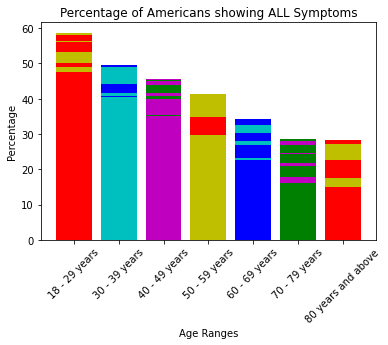

In [40]:
#prepare the data to plot
ages = us_by_age['Subgroup']
percent = us_by_age['Value']

#create bar chart
plt.bar(ages, percent, color= ('b', 'g', 'r', 'c', 'm', 'y'))

#adjust labels
plt.title('Percentage of Americans showing ALL Symptoms')
plt.xlabel('Age Ranges')
plt.xticks(rotation= 45)
plt.ylabel('Percentage')
plt.show()

In [41]:
us_by_age.groupby('Subgroup').describe().unstack(1)

              Subgroup          
Value  count  18 - 29 years         123.000000
              30 - 39 years         123.000000
              40 - 49 years         123.000000
              50 - 59 years         123.000000
              60 - 69 years         123.000000
              70 - 79 years         123.000000
              80 years and above    123.000000
       mean   18 - 29 years          43.867480
              30 - 39 years          35.890244
              40 - 49 years          32.382114
              50 - 59 years          29.236585
              60 - 69 years          23.019512
              70 - 79 years          16.996748
              80 years and above     15.722764
       std    18 - 29 years           6.228247
              30 - 39 years           6.464930
              40 - 49 years           6.135092
              50 - 59 years           5.781248
              60 - 69 years           5.181029
              70 - 79 years           4.495607
              80 years and 

In [42]:
#assign the above line of code to a variable for easier reading

age_unstacked = us_by_age.groupby('Subgroup').describe().unstack(1)

In [43]:
#try to plot one of the statistics - min 
max_age = us_by_age.groupby('Subgroup').max()

max_age

,Indicator,State,Group,Phases,Time Period Label,Value
Subgroup,,,,,,
18 - 29 years,Symptoms of Depressive Disorder,United States,By Age,Phase 7,"Sep 30 - Oct 12, 2020",58.7
30 - 39 years,Symptoms of Depressive Disorder,United States,By Age,Phase 7,"Sep 30 - Oct 12, 2020",49.5
40 - 49 years,Symptoms of Depressive Disorder,United States,By Age,Phase 7,"Sep 30 - Oct 12, 2020",45.6
50 - 59 years,Symptoms of Depressive Disorder,United States,By Age,Phase 7,"Sep 30 - Oct 12, 2020",41.3
60 - 69 years,Symptoms of Depressive Disorder,United States,By Age,Phase 7,"Sep 30 - Oct 12, 2020",34.2
70 - 79 years,Symptoms of Depressive Disorder,United States,By Age,Phase 7,"Sep 30 - Oct 12, 2020",28.6
80 years and above,Symptoms of Depressive Disorder,United States,By Age,Phase 7,"Sep 30 - Oct 12, 2020",28.3


### US by Sex

In [44]:
us_by_sex = us_only[us_only['Group'] == 'By Sex']

us_by_sex

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
8,Symptoms of Depressive Disorder,United States,By Sex,Male,Phase 1,"Apr 23 - May 5, 2020",20.8
9,Symptoms of Depressive Disorder,United States,By Sex,Female,Phase 1,"Apr 23 - May 5, 2020",26.1
78,Symptoms of Anxiety Disorder,United States,By Sex,Male,Phase 1,"Apr 23 - May 5, 2020",26.1
79,Symptoms of Anxiety Disorder,United States,By Sex,Female,Phase 1,"Apr 23 - May 5, 2020",35.4
148,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Sex,Male,Phase 1,"Apr 23 - May 5, 2020",31.0
...,...,...,...,...,...,...,...
8910,Symptoms of Depressive Disorder,United States,By Sex,Female,Phase 7,"Dec 29, 2021 - Jan 10, 2022",24.8
8987,Symptoms of Anxiety Disorder,United States,By Sex,Male,Phase 7,"Dec 29, 2021 - Jan 10, 2022",23.8
8988,Symptoms of Anxiety Disorder,United States,By Sex,Female,Phase 7,"Dec 29, 2021 - Jan 10, 2022",31.7
9065,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Sex,Male,Phase 7,"Dec 29, 2021 - Jan 10, 2022",28.0


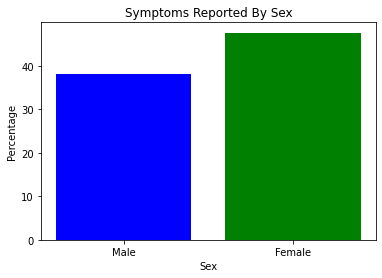

In [45]:
#prepare the data to plot
sex = us_by_sex['Subgroup']
percent = us_by_sex['Value']

#create bar chart
plt.bar(sex, percent, color = ('b', 'g'))

#adjust labels
plt.title('Symptoms Reported By Sex')
plt.xlabel('Sex')
plt.xticks(rotation= 0)
plt.ylabel('Percentage')
plt.show()

In [46]:
us_by_sex.groupby('Subgroup').describe().unstack(1)

              Subgroup
Value  count  Female      123.000000
              Male        123.000000
       mean   Female       33.586992
              Male         27.108943
       std    Female        6.416615
              Male          4.838541
       min    Female       22.400000
              Male         18.400000
       25%    Female       28.550000
              Male         23.200000
       50%    Female       33.400000
              Male         26.700000
       75%    Female       38.650000
              Male         30.850000
       max    Female       47.600000
              Male         38.000000
dtype: float64

In [47]:
#I want the bar graph to also show each symptom

#after last session, we determined that having 82 for each symptom may not be an error, so ok to proceed with EDA like this

us_by_sex['Indicator'].value_counts()

Symptoms of Depressive Disorder                        82
Symptoms of Anxiety Disorder                           82
Symptoms of Anxiety Disorder or Depressive Disorder    82
Name: Indicator, dtype: int64

In [48]:
#replace the indicator text with integers 

us_indicators = {'Symptoms of Depressive Disorder': 1,'Symptoms of Anxiety Disorder': 2, 'Symptoms of Anxiety Disorder or Depressive Disorder': 3}

In [49]:
#update dataframe with the new integers
numeric_ind = us_by_sex['Indicator'].replace(us_indicators)
numeric_ind

8       1
9       1
78      2
79      2
148     3
       ..
8910    1
8987    2
8988    2
9065    3
9066    3
Name: Indicator, Length: 246, dtype: int64

In [50]:
cat1 = numeric_ind == 1
cat2 = numeric_ind == 2
cat3 = numeric_ind == 3

cat1.value_counts()

False    164
True      82
Name: Indicator, dtype: int64

In [51]:
#symptoms df

plotdata = pd.DataFrame({'Depression' : 1, 'Anxiety' : 2, 'Both' :3}, index=[0])

<AxesSubplot:>

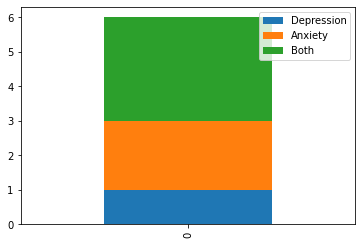

In [52]:
plotdata.plot(kind= 'bar', stacked = True)

### US By Race/Hispanic ethnicity

In [53]:
us_by_race = us_only[us_only['Group'] == 'By Race/Hispanic ethnicity']

us_by_race

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
10,Symptoms of Depressive Disorder,United States,By Race/Hispanic ethnicity,Hispanic or Latino,Phase 1,"Apr 23 - May 5, 2020",29.4
11,Symptoms of Depressive Disorder,United States,By Race/Hispanic ethnicity,"Non-Hispanic White, single race",Phase 1,"Apr 23 - May 5, 2020",21.4
12,Symptoms of Depressive Disorder,United States,By Race/Hispanic ethnicity,"Non-Hispanic Black, single race",Phase 1,"Apr 23 - May 5, 2020",25.6
13,Symptoms of Depressive Disorder,United States,By Race/Hispanic ethnicity,"Non-Hispanic Asian, single race",Phase 1,"Apr 23 - May 5, 2020",23.6
14,Symptoms of Depressive Disorder,United States,By Race/Hispanic ethnicity,"Non-Hispanic, other races and multiple races",Phase 1,"Apr 23 - May 5, 2020",28.3
...,...,...,...,...,...,...,...
9073,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Race/Hispanic ethnicity,Hispanic or Latino,Phase 7,"Dec 29, 2021 - Jan 10, 2022",35.5
9074,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Race/Hispanic ethnicity,"Non-Hispanic White, single race",Phase 7,"Dec 29, 2021 - Jan 10, 2022",31.0
9075,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Race/Hispanic ethnicity,"Non-Hispanic Black, single race",Phase 7,"Dec 29, 2021 - Jan 10, 2022",34.4
9076,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Race/Hispanic ethnicity,"Non-Hispanic Asian, single race",Phase 7,"Dec 29, 2021 - Jan 10, 2022",24.3


In [54]:
us_by_race.groupby('Subgroup').describe().unstack(1)

              Subgroup                                    
Value  count  Hispanic or Latino                              123.000000
              Non-Hispanic Asian, single race                 123.000000
              Non-Hispanic Black, single race                 123.000000
              Non-Hispanic White, single race                 123.000000
              Non-Hispanic, other races and multiple races    123.000000
       mean   Hispanic or Latino                               34.800000
              Non-Hispanic Asian, single race                  24.774797
              Non-Hispanic Black, single race                  32.673984
              Non-Hispanic White, single race                  28.968293
              Non-Hispanic, other races and multiple races     39.165041
       std    Hispanic or Latino                                5.990443
              Non-Hispanic Asian, single race                   5.655124
              Non-Hispanic Black, single race                   5

In [55]:
filtered_us_by_race = us_by_race[['Group', 'Subgroup','Value']]

filtered_us_by_race

,Group,Subgroup,Value
10,By Race/Hispanic ethnicity,Hispanic or Latino,29.4
11,By Race/Hispanic ethnicity,"Non-Hispanic White, single race",21.4
12,By Race/Hispanic ethnicity,"Non-Hispanic Black, single race",25.6
13,By Race/Hispanic ethnicity,"Non-Hispanic Asian, single race",23.6
14,By Race/Hispanic ethnicity,"Non-Hispanic, other races and multiple races",28.3
...,...,...,...
9073,By Race/Hispanic ethnicity,Hispanic or Latino,35.5
9074,By Race/Hispanic ethnicity,"Non-Hispanic White, single race",31.0
9075,By Race/Hispanic ethnicity,"Non-Hispanic Black, single race",34.4
9076,By Race/Hispanic ethnicity,"Non-Hispanic Asian, single race",24.3


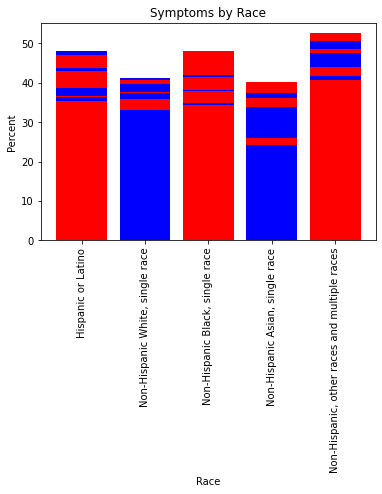

In [56]:
#prepare the data to plot
race = filtered_us_by_race['Subgroup']
percent = filtered_us_by_race['Value']

#create bar chart
plt.bar(race, percent, color= ('r', 'b'))

#adjust labels
plt.title('Symptoms by Race')
plt.xlabel('Race')
plt.xticks(rotation= 90)
plt.ylabel('Percent')
plt.show()

In [57]:
filtered_us_by_race[filtered_us_by_race['Subgroup'] == ('Non-Hispanic, other races and multiple races')]['Value'].min()

27.1

In [58]:
filtered_us_by_race.describe()

,Value
count,615.000000
mean,32.076423
std,7.602268
min,15.100000
25%,26.550000
50%,31.800000
75%,37.150000
max,52.600000


### US By Education

In [59]:
us_by_edu = us_only[us_only['Group'] == 'By Education']

us_by_edu

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
15,Symptoms of Depressive Disorder,United States,By Education,Less than a high school diploma,Phase 1,"Apr 23 - May 5, 2020",32.7
16,Symptoms of Depressive Disorder,United States,By Education,High school diploma or GED,Phase 1,"Apr 23 - May 5, 2020",25.4
17,Symptoms of Depressive Disorder,United States,By Education,Some college/Associate's degree,Phase 1,"Apr 23 - May 5, 2020",25.6
18,Symptoms of Depressive Disorder,United States,By Education,Bachelor's degree or higher,Phase 1,"Apr 23 - May 5, 2020",17.6
85,Symptoms of Anxiety Disorder,United States,By Education,Less than a high school diploma,Phase 1,"Apr 23 - May 5, 2020",37.3
...,...,...,...,...,...,...,...
9003,Symptoms of Anxiety Disorder,United States,By Education,Bachelor's degree or higher,Phase 7,"Dec 29, 2021 - Jan 10, 2022",24.3
9078,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Education,Less than a high school diploma,Phase 7,"Dec 29, 2021 - Jan 10, 2022",33.0
9079,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Education,High school diploma or GED,Phase 7,"Dec 29, 2021 - Jan 10, 2022",32.7
9080,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Education,Some college/Associate's degree,Phase 7,"Dec 29, 2021 - Jan 10, 2022",36.2


In [60]:
us_by_edu.groupby('Subgroup').describe().unstack(1)

              Subgroup                       
Value  count  Bachelor's degree or higher        123.000000
              High school diploma or GED         123.000000
              Less than a high school diploma    123.000000
              Some college/Associate's degree    123.000000
       mean   Bachelor's degree or higher         24.833333
              High school diploma or GED          31.425203
              Less than a high school diploma     37.643089
              Some college/Associate's degree     33.766667
       std    Bachelor's degree or higher          6.158024
              High school diploma or GED           5.157560
              Less than a high school diploma      6.111761
              Some college/Associate's degree      5.729985
       min    Bachelor's degree or higher         13.400000
              High school diploma or GED          22.700000
              Less than a high school diploma     23.300000
              Some college/Associate's degree     23.6

In [61]:
us_by_edu.groupby(['Subgroup']).agg(['median', 'max', 'min'])

#look at lambda next time

C:\Users\17134\AppData\Local\Temp\ipykernel_16324\1920362515.py:1: FutureWarning: ['Indicator', 'State', 'Group', 'Phases', 'Time Period Label'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  us_by_edu.groupby(['Subgroup']).agg(['median', 'max', 'min'])


Value            
                                median   max   min
Subgroup                                          
Bachelor's degree or higher       24.3  37.5  13.4
High school diploma or GED        30.8  44.7  22.7
Less than a high school diploma   37.1  53.0  23.3
Some college/Associate's degree   33.6  46.4  23.6

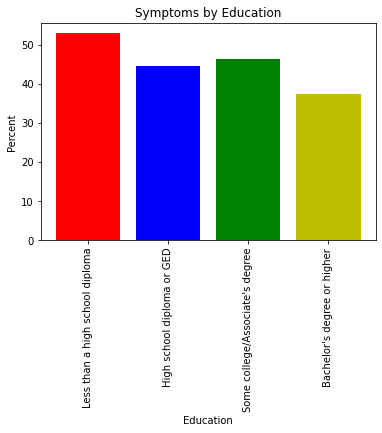

In [62]:
#prepare the data to plot
education = us_by_edu['Subgroup']
percent = us_by_edu['Value']

#create bar chart
plt.bar(education, percent, color= ('r', 'b', 'g', 'y'))

#adjust labels
plt.title('Symptoms by Education')
plt.xlabel('Education')
plt.xticks(rotation= 90)
plt.ylabel('Percent')
plt.show()

### US By Disability

In [63]:
us_by_disability = us_only[us_only['Group'] == 'By Disability status']

us_by_disability

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
5822,Symptoms of Depressive Disorder,United States,By Disability status,With disability,Phase 5,"Apr 14 - Apr 26, 2021",52.9
5823,Symptoms of Depressive Disorder,United States,By Disability status,Without disability,Phase 5,"Apr 14 - Apr 26, 2021",18.5
5913,Symptoms of Anxiety Disorder,United States,By Disability status,With disability,Phase 5,"Apr 14 - Apr 26, 2021",56.3
5914,Symptoms of Anxiety Disorder,United States,By Disability status,Without disability,Phase 5,"Apr 14 - Apr 26, 2021",23.0
6004,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Disability status,With disability,Phase 5,"Apr 14 - Apr 26, 2021",64.3
...,...,...,...,...,...,...,...
8927,Symptoms of Depressive Disorder,United States,By Disability status,Without disability,Phase 7,"Dec 29, 2021 - Jan 10, 2022",18.2
9004,Symptoms of Anxiety Disorder,United States,By Disability status,With disability,Phase 7,"Dec 29, 2021 - Jan 10, 2022",54.2
9005,Symptoms of Anxiety Disorder,United States,By Disability status,Without disability,Phase 7,"Dec 29, 2021 - Jan 10, 2022",23.5
9082,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Disability status,With disability,Phase 7,"Dec 29, 2021 - Jan 10, 2022",60.4


In [64]:
us_by_disability[['Group', 'Subgroup', 'Value']]

,Group,Subgroup,Value
5822,By Disability status,With disability,52.9
5823,By Disability status,Without disability,18.5
5913,By Disability status,With disability,56.3
5914,By Disability status,Without disability,23.0
6004,By Disability status,With disability,64.3
...,...,...,...
8927,By Disability status,Without disability,18.2
9004,By Disability status,With disability,54.2
9005,By Disability status,Without disability,23.5
9082,By Disability status,With disability,60.4


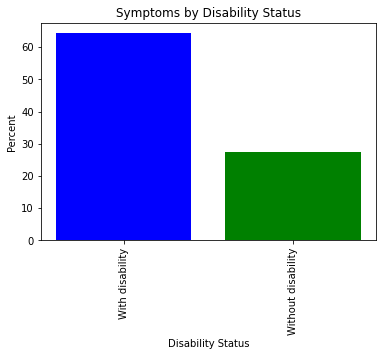

In [65]:
#prepare the data to plot
disability = us_by_disability['Subgroup']
percent = us_by_disability['Value']

#create bar chart
plt.bar(disability, percent, color= ('r', 'b', 'g'))

#adjust labels
plt.title('Symptoms by Disability Status')
plt.xlabel('Disability Status')
plt.xticks(rotation= 90)
plt.ylabel('Percent')
plt.show()

In [66]:
us_by_disability.groupby('Subgroup').describe().unstack(1)

              Subgroup          
Value  count  With disability       42.000000
              Without disability    42.000000
       mean   With disability       55.538095
              Without disability    21.992857
       std    With disability        4.991161
              Without disability     3.736791
       min    With disability       46.200000
              Without disability    16.700000
       25%    With disability       50.775000
              Without disability    17.775000
       50%    With disability       54.400000
              Without disability    22.400000
       75%    With disability       60.550000
              Without disability    25.625000
       max    With disability       64.300000
              Without disability    27.400000
dtype: float64

### US By Gender Identity

In [67]:
us_by_gi = us_only[us_only['Group'] == 'By Gender identity']

us_by_gi

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
7168,Symptoms of Depressive Disorder,United States,By Gender identity,Cis-gender male,Phase 6,"Jul 21 - Aug 2, 2021",20.3
7169,Symptoms of Depressive Disorder,United States,By Gender identity,Cis-gender female,Phase 6,"Jul 21 - Aug 2, 2021",22.5
7170,Symptoms of Depressive Disorder,United States,By Gender identity,Transgender,Phase 6,"Jul 21 - Aug 2, 2021",60.8
7267,Symptoms of Anxiety Disorder,United States,By Gender identity,Cis-gender male,Phase 6,"Jul 21 - Aug 2, 2021",22.8
7268,Symptoms of Anxiety Disorder,United States,By Gender identity,Cis-gender female,Phase 6,"Jul 21 - Aug 2, 2021",29.6
...,...,...,...,...,...,...,...
8990,Symptoms of Anxiety Disorder,United States,By Gender identity,Cis-gender female,Phase 7,"Dec 29, 2021 - Jan 10, 2022",31.2
8991,Symptoms of Anxiety Disorder,United States,By Gender identity,Transgender,Phase 7,"Dec 29, 2021 - Jan 10, 2022",50.4
9067,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Gender identity,Cis-gender male,Phase 7,"Dec 29, 2021 - Jan 10, 2022",27.6
9068,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Gender identity,Cis-gender female,Phase 7,"Dec 29, 2021 - Jan 10, 2022",35.2


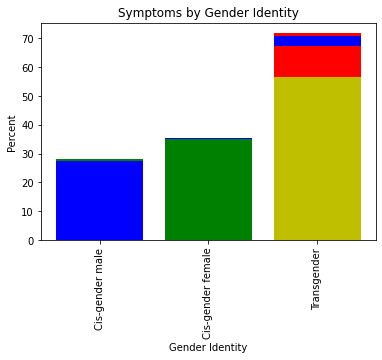

In [68]:
#prepare the data to plot
gender = us_by_gi['Subgroup']
percent = us_by_gi['Value']

#create bar chart
plt.bar(gender, percent, color= ('r', 'b', 'g', 'y'))

#adjust labels
plt.title('Symptoms by Gender Identity')
plt.xlabel('Gender Identity')
plt.xticks(rotation= 90)
plt.ylabel('Percent')
plt.show()

In [69]:
us_by_gi.groupby('Subgroup').describe().unstack(1)

              Subgroup         
Value  count  Cis-gender female    24.000000
              Cis-gender male      24.000000
              Transgender          24.000000
       mean   Cis-gender female    29.316667
              Cis-gender male      23.408333
              Transgender          57.391667
       std    Cis-gender female     4.874304
              Cis-gender male       3.189782
              Transgender           8.311800
       min    Cis-gender female    22.200000
              Cis-gender male      19.000000
              Transgender          45.100000
       25%    Cis-gender female    23.600000
              Cis-gender male      20.375000
              Transgender          50.100000
       50%    Cis-gender female    30.850000
              Cis-gender male      22.850000
              Transgender          56.500000
       75%    Cis-gender female    33.550000
              Cis-gender male      26.975000
              Transgender          65.425000
       max    Cis-gende

### US By Sexual Orientation

In [70]:
us_by_so = us_only[us_only['Group'] == 'By Sexual orientation']

us_by_so

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
7171,Symptoms of Depressive Disorder,United States,By Sexual orientation,Gay or lesbian,Phase 6,"Jul 21 - Aug 2, 2021",31.2
7172,Symptoms of Depressive Disorder,United States,By Sexual orientation,Straight,Phase 6,"Jul 21 - Aug 2, 2021",19.7
7173,Symptoms of Depressive Disorder,United States,By Sexual orientation,Bisexual,Phase 6,"Jul 21 - Aug 2, 2021",49.8
7270,Symptoms of Anxiety Disorder,United States,By Sexual orientation,Gay or lesbian,Phase 6,"Jul 21 - Aug 2, 2021",38.4
7271,Symptoms of Anxiety Disorder,United States,By Sexual orientation,Straight,Phase 6,"Jul 21 - Aug 2, 2021",24.3
...,...,...,...,...,...,...,...
8993,Symptoms of Anxiety Disorder,United States,By Sexual orientation,Straight,Phase 7,"Dec 29, 2021 - Jan 10, 2022",25.2
8994,Symptoms of Anxiety Disorder,United States,By Sexual orientation,Bisexual,Phase 7,"Dec 29, 2021 - Jan 10, 2022",52.6
9070,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Sexual orientation,Gay or lesbian,Phase 7,"Dec 29, 2021 - Jan 10, 2022",48.9
9071,Symptoms of Anxiety Disorder or Depressive Dis...,United States,By Sexual orientation,Straight,Phase 7,"Dec 29, 2021 - Jan 10, 2022",29.3


In [71]:
us_by_so['Subgroup'].unique()

array(['Gay or lesbian', 'Straight', 'Bisexual'], dtype=object)

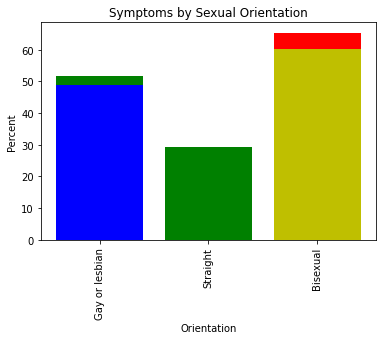

In [72]:
#prepare the data to plot
orientation = us_by_so['Subgroup']
percent = us_by_so['Value']

#create bar chart
plt.bar(orientation, percent, color=('r', 'b', 'g', 'y'))

#adjust labels
plt.title('Symptoms by Sexual Orientation')
plt.xlabel('Orientation')
plt.xticks(rotation= 90)
plt.ylabel('Percent')
plt.show()

In [73]:
us_by_so.groupby('Subgroup').describe().unstack(1)

              Subgroup      
Value  count  Bisexual          24.000000
              Gay or lesbian    24.000000
              Straight          24.000000
       mean   Bisexual          54.683333
              Gay or lesbian    41.325000
              Straight          24.441667
       std    Bisexual           6.343752
              Gay or lesbian     5.933197
              Straight           3.857902
       min    Bisexual          44.600000
              Gay or lesbian    30.400000
              Straight          19.100000
       25%    Bisexual          48.950000
              Gay or lesbian    37.600000
              Straight          20.050000
       50%    Bisexual          54.350000
              Gay or lesbian    41.350000
              Straight          24.900000
       75%    Bisexual          59.325000
              Gay or lesbian    45.075000
              Straight          28.325000
       max    Bisexual          65.400000
              Gay or lesbian    51.800000
     

## Texas Statistics

In [74]:
#Assign colors to each Indicator *texas df only*


#create a list of conditions
color_conditions = [ 
    (states_only['Indicator'] == 'Symptoms of Anxiety Disorder'), #RED
    (states_only['Indicator'] == 'Symptoms of Depressive Disorder'), #BLUE
    (states_only['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder'), #BLACK
    ]
#create a list of the values we want to assign for each condition
colors = ['Red','Blue','Black']

#use np.select to assign values 
tx_indicator_colors = np.select(color_conditions, colors)

In [75]:
#State of Texas only

states_only_texas = states_only[states_only['Subgroup'] == 'Texas']

states_only_texas.head()

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
62,Symptoms of Depressive Disorder,Texas,By State,Texas,Phase 1,"Apr 23 - May 5, 2020",24.4
132,Symptoms of Anxiety Disorder,Texas,By State,Texas,Phase 1,"Apr 23 - May 5, 2020",29.7
202,Symptoms of Anxiety Disorder or Depressive Dis...,Texas,By State,Texas,Phase 1,"Apr 23 - May 5, 2020",34.9
272,Symptoms of Depressive Disorder,Texas,By State,Texas,Phase 1,"May 7 - May 12, 2020",25.7
342,Symptoms of Anxiety Disorder,Texas,By State,Texas,Phase 1,"May 7 - May 12, 2020",32.4


### Texas: Trends in Symptoms

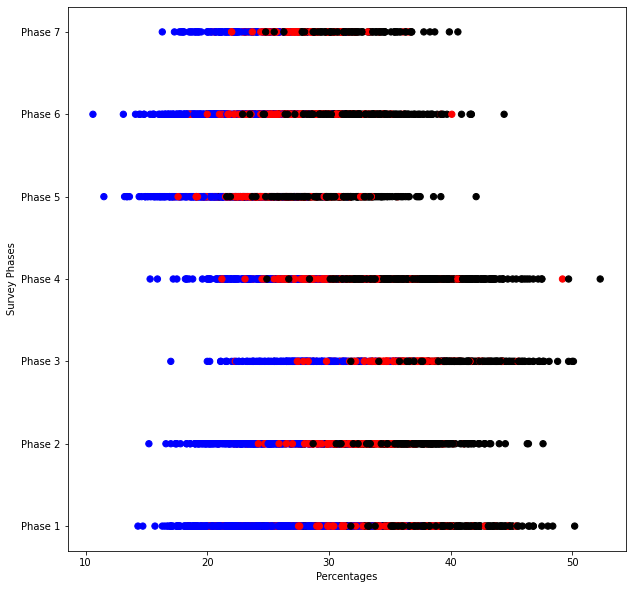

In [76]:
#STATES ONLY TEXAS SUBGROUP = STATES ONLY DF [SUBGROUP] == TEXAS

#plot figure size
plt.figure(figsize= (10, 10))

#tell it which values to plot
plt.scatter(x = states_only['Value'], y = states_only['Phases'], s= 40, c= tx_indicator_colors)

#axis labels
plt.xlabel("Percentages")
plt.ylabel("Survey Phases")

#display plot
plt.show()

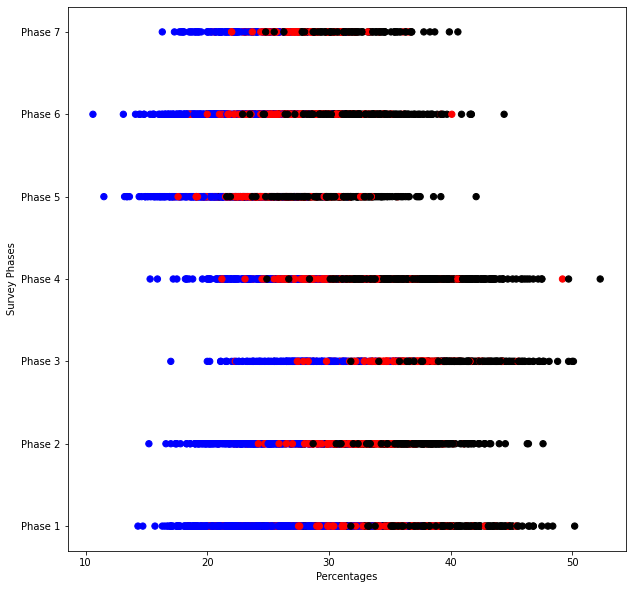

In [77]:
#TEXAS DF = CLEAN DF -> [STATE] == TEXAS

#plot figure size
plt.figure(figsize= (10, 10))

#tell it which values to plot
plt.scatter(x = states_only['Value'], y = states_only['Phases'], s= 40, c= tx_indicator_colors)

#axis labels
plt.xlabel("Percentages")
plt.ylabel("Survey Phases")

#display plot
plt.show()

In [78]:
#It seems that as time progressed the overall percentage of symptoms decreased in comparison to the beginning of the pandemic**
#Phase 3 seems significantly higher than the others**

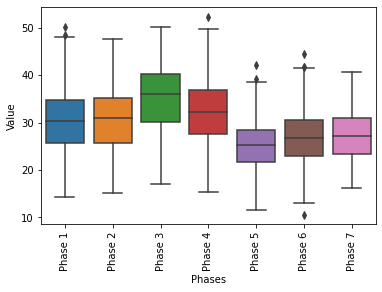

In [79]:
#boxplot test using seaborn

sns.boxplot(x="Phases", y="Value", data=states_only)
plt.xticks(rotation=90)

plt.show()

### Texas By Age

In [80]:
#create a Texas df that filters by Age

age_df = df[clean_df['Group'] == 'By Age']

texas_age_df = age_df#[age_df.State == 'Texas']

texas_age_df

#This seems to be pulling in the original df, not the cleaned df. 
#I cant filter Texas only, State column only has United States as a value

C:\Users\17134\AppData\Local\Temp\ipykernel_16324\999313849.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_df = df[clean_df['Group'] == 'By Age']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
#plot figure size
plt.figure(figsize= (10, 10))

#tell it which values to plot
plt.scatter(x = , y = , s= 4, c= tx_indicator_colors)

#axis labels
plt.xlabel("")
plt.ylabel("")

#display plot
plt.show()

SyntaxError: invalid syntax (1133060878.py, line 5)

### Texas By Race

In [ ]:
#in the Texas df, look at By Race

In [ ]:
#example
def function_name(parameters):
    # do something
    print("hello!")
    return None

In [ ]:
def double(number):
    output = number+number
    return output

In [ ]:
double(5)

10

In [ ]:
double(15)

30